___
## Attempt to convert osm to geojson failed - how to download maps dynamically?

In [1]:
# min_long = 37.52408
# min_lat = 55.70015
# max_long = 37.54093
# max_lat = 55.70514
# addr = "\"https://api.openstreetmap.org/api/0.6/map?bbox=" \
#     + str(min_long)  + ',' + str(min_lat) + ',' + str(max_long) + ',' + str(max_lat) + '"'

# !curl -o test_map.osm $addr

# import shutil
# import sys
# !mv test_map.osm data
# # with open('data/test_map.osm', encoding='utf-8') as file:
# #     shutil.copyfileobj(file, sys.stdout)

In [2]:
# import codecs
# import osm2geojson
# import geopandas

# with codecs.open('data/test_map.osm', 'r', encoding='utf-8') as data:
#     xml = data.read()

# geojson = osm2geojson.xml2geojson(xml, filter_used_refs=False, log_level='INFO')

# gp.read_file(geojson)

[Parts of the world](http://download.geofabrik.de/)  
[Cities](https://download.bbbike.org/osm/bbbike/)  
[Choose borders](https://extract.bbbike.org/)  
[OSM API](https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL) - possible solution

___
## Using predownloaded map

In [3]:
from parsers.osm_parser import OsmParser

filename = "maps/kozlovo.osm.pbf"
bbox = [35.9, 56.575, 36.12, 56.6]
map_data = OsmParser(filename, bbox)

In [4]:
map_data.polygons.plot(column='natural', legend=True, figsize=(10,6));

In [5]:
if not map_data.multipolygons.empty:
    map_data.multipolygons.plot(column='natural', legend=True, figsize=(10,6));

In [6]:
if not map_data.multilinestrings.empty:
    map_data.multilinestrings.plot(column='natural', legend=True, figsize=(10,6));

In [7]:
epsilon = 0.001
bbox_comp = 25
cv=False
polygons, multilinestrings = map_data.build_dataframe(epsilon=epsilon, bbox_comp=bbox_comp, ellipse=False, cv=cv)

___
## Build a graph

In [8]:
from graph import build_graph, find_pair_cutoff, find_pair_array, find_pair_ellipse, find_pair_non_convex
import matplotlib.pyplot as plt
import mplleaflet

In [11]:
%%time
view_angle = 5
G, fig = build_graph(polygons, multilinestrings=multilinestrings, pair_func=find_pair_non_convex, cv=cv,
                     plot=False, view_angle=view_angle, point_approx=False)
print('edges: ', G.number_of_edges())
print('nodes: ', G.number_of_nodes())
# mplleaflet.display(fig=fig)

edges:  1078
nodes:  339
CPU times: user 49 s, sys: 840 µs, total: 49 s
Wall time: 49.8 s


<Figure size 432x288 with 0 Axes>

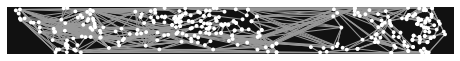

In [12]:
import osmnx as ox
ox.plot_graph(G);

In [11]:
# from graph import first_point, find_points
# view_angle = 5
# start = [36.06, 56.585]
# view_points = first_point(start, polygons, multilinestrings)
# ###
# fig = plt.figure()
# plt.scatter(start[0], start[1], color='black')
# for point in view_points:
#     plt.scatter(point[0], point[1], color='red')
# mplleaflet.display(fig=fig)
# ###
# chosen_point = view_points[6]
# new_points = find_points(chosen_point, polygons, multilinestrings)
# ###
# fig = plt.figure()
# plt.scatter(chosen_point[0], chosen_point[1], color='black')
# # plt.scatter(36.0490333, 56.5753, color='blue')
# # plt.scatter(36.0409713, 56.5764058, color='blue')
# for point in new_points:
#     plt.scatter(point[0], point[1], color='red')
# mplleaflet.display(fig=fig)

___
Problems:
- Remove single add_point
- Update find_first and find_points
- Test with convex
- A*
___
- Additional natural attributes not in dataframe
- How to store graph?